### Student Information
Name: 謝舜卿

Student ID: NCCU_113152012

GitHub ID: Megan123123

---

### First Phase Submission

=== Phase 1: Reddit Stock Sentiment Dataset Analysis ===
Loading Reddit stock sentiment dataset...
Dataset shape: (847, 16)
Columns: ['type', 'datetime', 'post_id', 'subreddit', 'title', 'author', 'url', 'upvotes', 'downvotes', 'upvote_ratio', 'text', 'subjectivity', 'polarity', 'sentiment', 'entities', 'label']

First few rows:
      type             datetime  post_id         subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w    wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9    wallstreetbets   
2  comment  2025-04-10 15:09:41  mmeevio       StockMarket   
3     post  2023-08-30 17:12:55  165kllm  stockstobuytoday   
4  comment  2025-04-11 14:48:05  mmkl6bw       StockMarket   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   
2  How do you feel about a sitting president maki...          

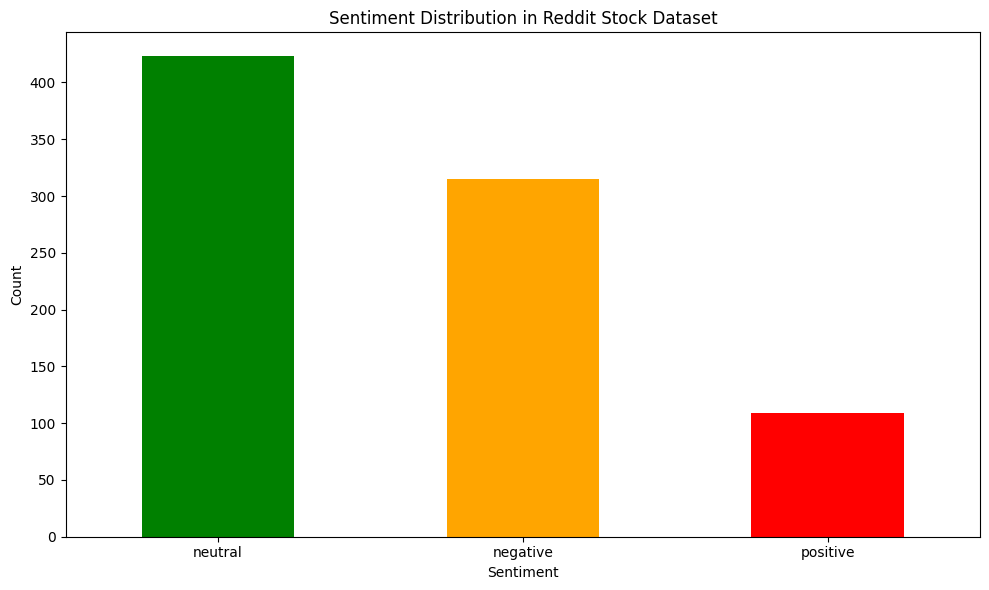

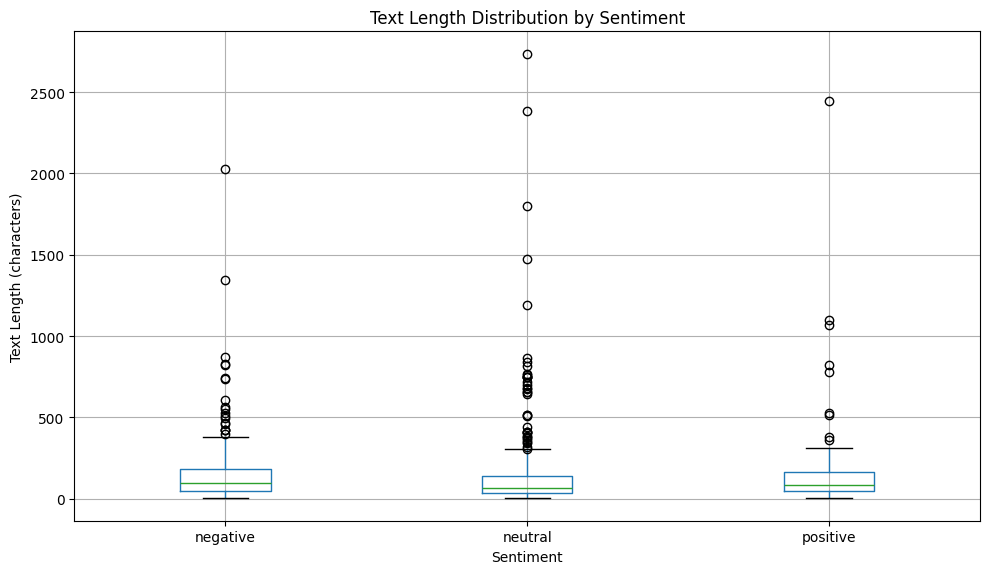

✅ Phase 1 basic analysis completed!
✅ Dataset loaded and preprocessed successfully!
✅ Ready for further analysis similar to Master file exercises!


In [18]:
# Phase 1: Reddit Stock Sentiment Dataset Analysis
print("=== Phase 1: Reddit Stock Sentiment Dataset Analysis ===")

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
import warnings
warnings.filterwarnings('ignore')

# Load the Reddit stock sentiment dataset
print("Loading Reddit stock sentiment dataset...")
df = pd.read_csv('newdataset/Reddit-stock-sentiment.csv')

print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"\nFirst few rows:")
print(df.head())

# Basic dataset information
print(f"\n=== Dataset Overview ===")
print(f"Total records: {len(df)}")
print(f"Text column type: {type(df['text'].iloc[0])}")
print(f"Label distribution:")
print(df['label'].value_counts().sort_index())

# Check for missing values
print(f"\n=== Missing Values ===")
print(df.isnull().sum())

# Create simplified dataset (like the Master file)
print(f"\n=== Creating Simplified Dataset ===")
# Keep only necessary columns
X = df[['text', 'label']].copy()
X = X.dropna()  # Remove rows with missing text or label

# Rename columns to match Master file structure
X.columns = ['text', 'category']
X['category_name'] = X['category'].map({1.0: 'positive', 0.0: 'neutral', -1.0: 'negative'})

print(f"Simplified dataset shape: {X.shape}")
print(f"Category distribution:")
print(X['category_name'].value_counts())

# Sample the data for analysis (like X_sample in Master file)
X_sample = X.sample(n=min(1000, len(X)), random_state=42)
print(f"Sample dataset shape: {X_sample.shape}")

# Basic text analysis
print(f"\n=== Text Analysis ===")
X['text_length'] = X['text'].str.len()
print(f"Text length statistics:")
print(X['text_length'].describe())

# Category distribution visualization
plt.figure(figsize=(10, 6))
X['category_name'].value_counts().plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Sentiment Distribution in Reddit Stock Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Text length by category
plt.figure(figsize=(10, 6))
X.boxplot(column='text_length', by='category_name', ax=plt.gca())
plt.title('Text Length Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Text Length (characters)')
plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.show()

print("✅ Phase 1 basic analysis completed!")
print("✅ Dataset loaded and preprocessed successfully!")
print("✅ Ready for further analysis similar to Master file exercises!")


In [6]:
# Exercise 1: Print first 3 samples
print("=== Exercise 1: First 3 Samples ===")
for i in range(3):
    print(f"Sample {i+1}:")
    print(f"Text: {X.iloc[i]['text'][:200]}...")
    print(f"Category: {X.iloc[i]['category_name']}")
    print("-" * 50)

# Exercise 2: Pandas querying techniques
print("\n=== Exercise 2: Pandas Querying ===")
# Basic queries
print("First 5 rows:")
print(X[['text', 'category_name']].head())

# Conditional queries
positive_docs = X[X['category_name'] == 'positive']
print(f"\nPositive documents: {len(positive_docs)}")

# Text length analysis
long_docs = X[X['text_length'] > 500]
print(f"Documents longer than 500 characters: {len(long_docs)}")

# Exercise 3: Query every 10th record from positive category
print("\n=== Exercise 3: Every 10th Positive Record ===")
positive_records = X[X['category_name'] == 'positive']
every_10th = positive_records.iloc[::10]
print(f"Every 10th positive record count: {len(every_10th)}")
print("First 3 every 10th records:")
for i in range(min(3, len(every_10th))):
    print(f"Record {i+1}: {every_10th.iloc[i]['text'][:100]}...")

# Exercise 4: Missing values by record
print("\n=== Exercise 4: Missing Values by Record ===")
missing_by_record = X.isnull().sum(axis=1)
print(f"Records with missing values: {missing_by_record.sum()}")
print(f"Records with 0 missing values: {(missing_by_record == 0).sum()}")

# Exercise 5: Missing values analysis
print("\n=== Exercise 5: Missing Values Analysis ===")
print("Missing values per column:")
print(X.isnull().sum())

# Exercise 6: Compare X and X_sample
print("\n=== Exercise 6: X vs X_sample Comparison ===")
print(f"Original X shape: {X.shape}")
print(f"X_sample shape: {X_sample.shape}")
print(f"Reduction: {((X.shape[0] - X_sample.shape[0]) / X.shape[0]) * 100:.1f}%")

# Category distribution comparison
print("\nCategory distribution comparison:")
print("Original X:")
print(X['category_name'].value_counts())
print("\nX_sample:")
print(X_sample['category_name'].value_counts())

print("\n✅ Basic exercises completed!")


=== Exercise 1: First 3 Samples ===
Sample 1:
Text: Calls on retards...
Category: negative
--------------------------------------------------
Sample 2:
Text: Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever....
Category: neutral
--------------------------------------------------
Sample 3:
Text: Seeing lots of red in the ticker....
Category: neutral
--------------------------------------------------

=== Exercise 2: Pandas Querying ===
First 5 rows:
                                                text category_name
0                                   Calls on retards      negative
1  Stunt as in like why did they even make a big ...       neutral
2                  Seeing lots of red in the ticker.       neutral
3  Vision Marine Technologies Inc. is rewriting t...      positive
4                           He didn’t say thank you.      negative

Positive documents: 109
Documents longer than 500 charac

=== Text Processing and Visualization ===
Creating term-document matrix...
Term-document matrix shape: (847, 4346)
Vocabulary size: 4346

=== Exercise 7: Dynamic ylim Parameter ===


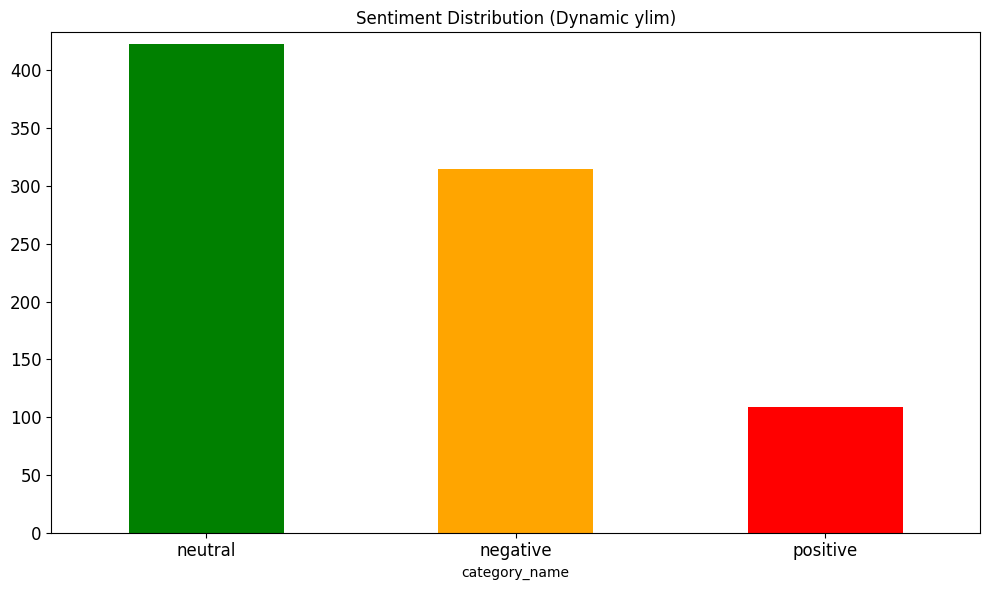


=== Exercise 8: Distribution Comparison ===


<Figure size 1200x600 with 0 Axes>

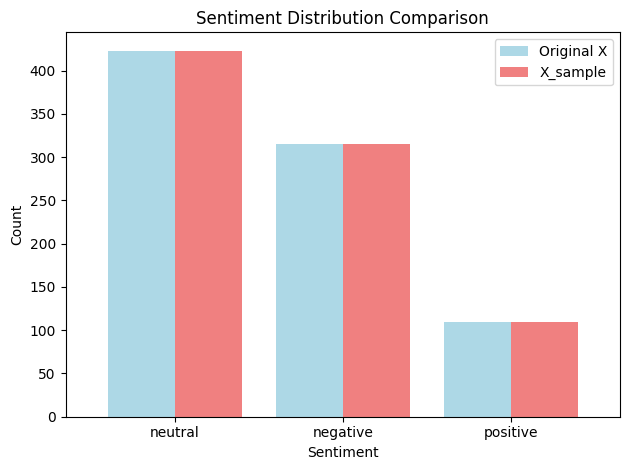


=== Exercise 9: Text Analysis with Analyzer ===
First record category: negative
Text length: 16 characters
Tokenized tokens: 3
First 10 tokens: ['calls', 'on', 'retards']

=== Exercise 10: Word Analysis ===
Second word in fifth record: 'he'
Total words in fifth record: 5

=== Exercise 11: Sparse Matrix Visualization ===


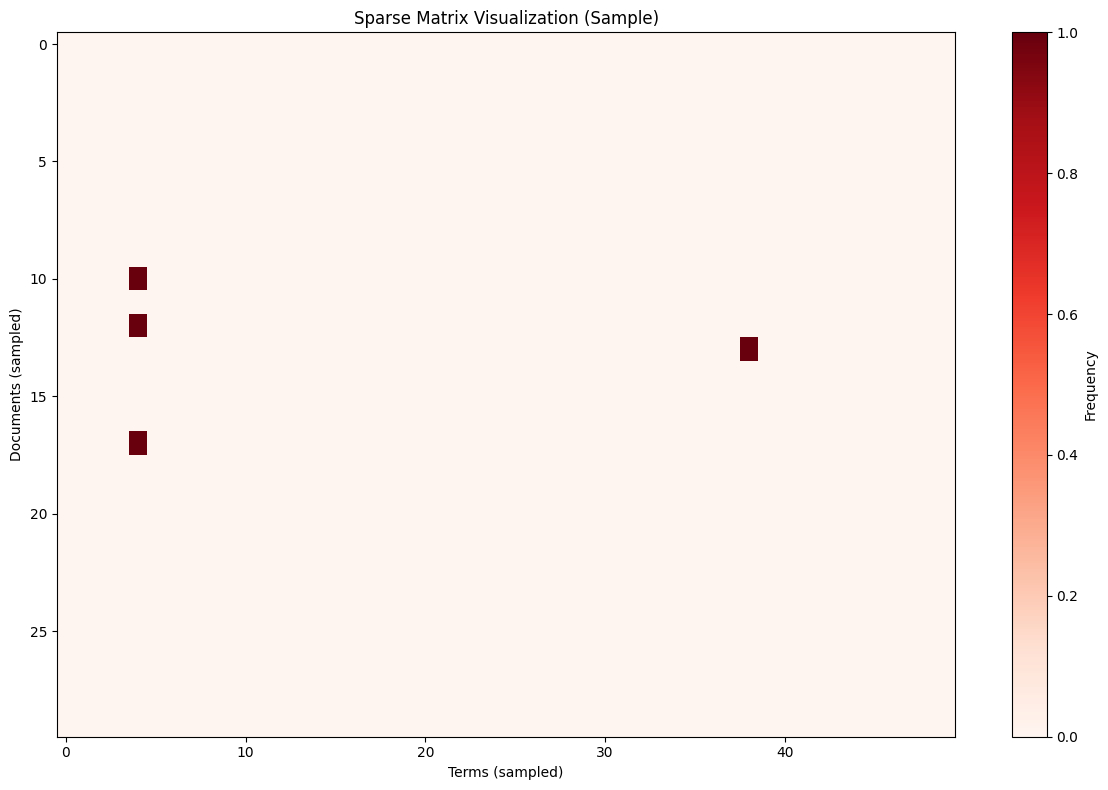


=== Exercise 12: Interactive Visualization ===



=== Exercise 13: Efficient Term Reduction ===


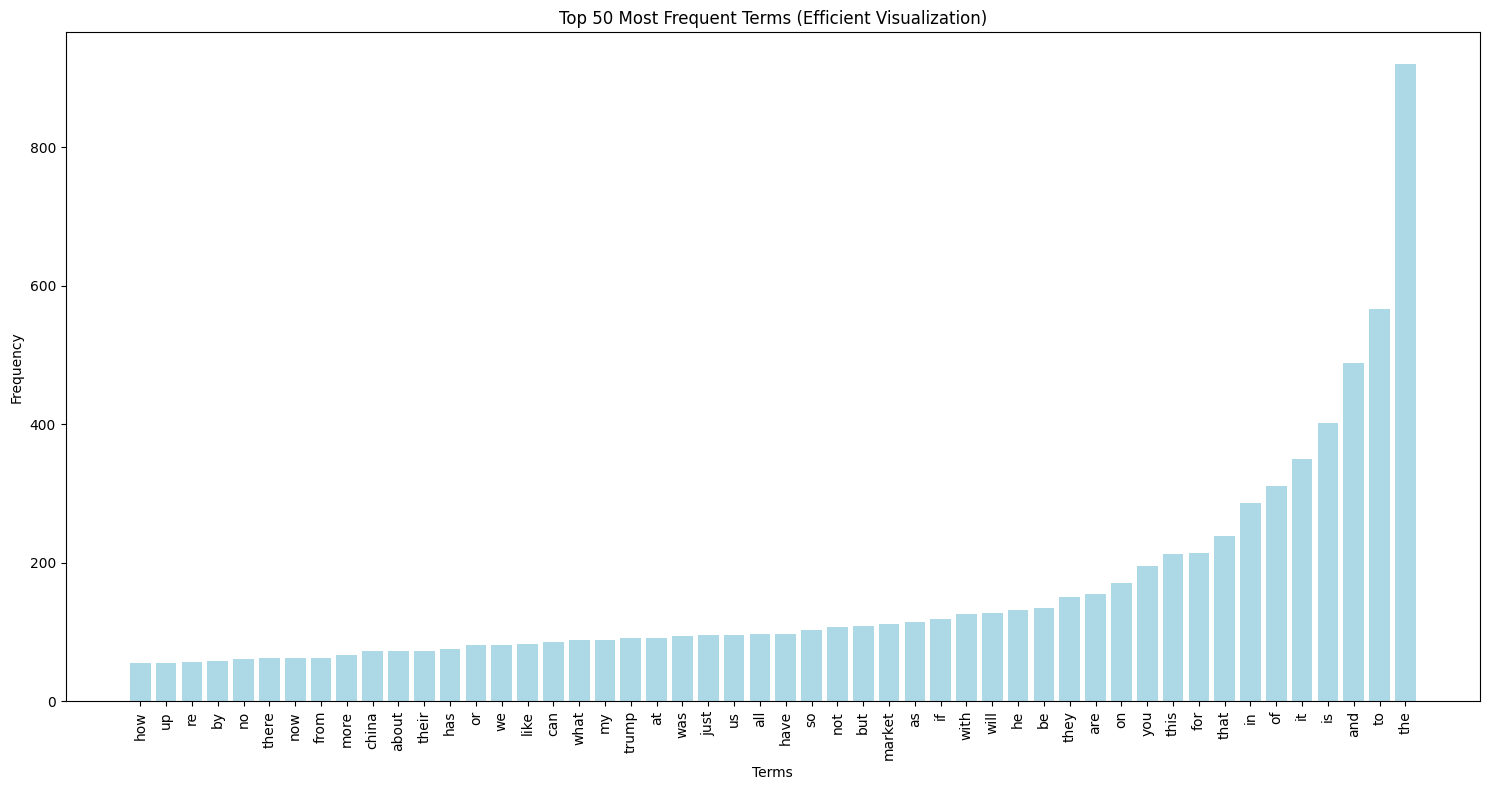

Reduced from 4346 terms to 50 terms
Computation time reduced by 98.8%

=== Exercise 14: Long Tail Pattern ===


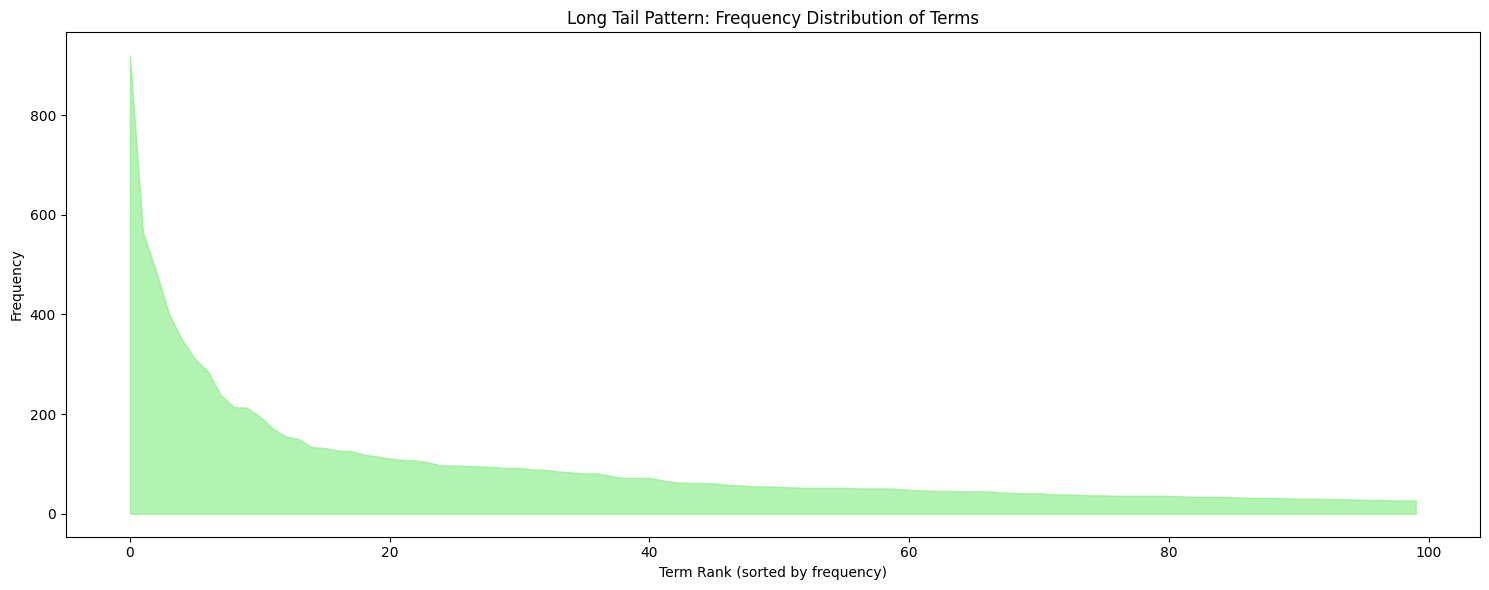


=== Exercise 15: Log Transformation Comparison ===


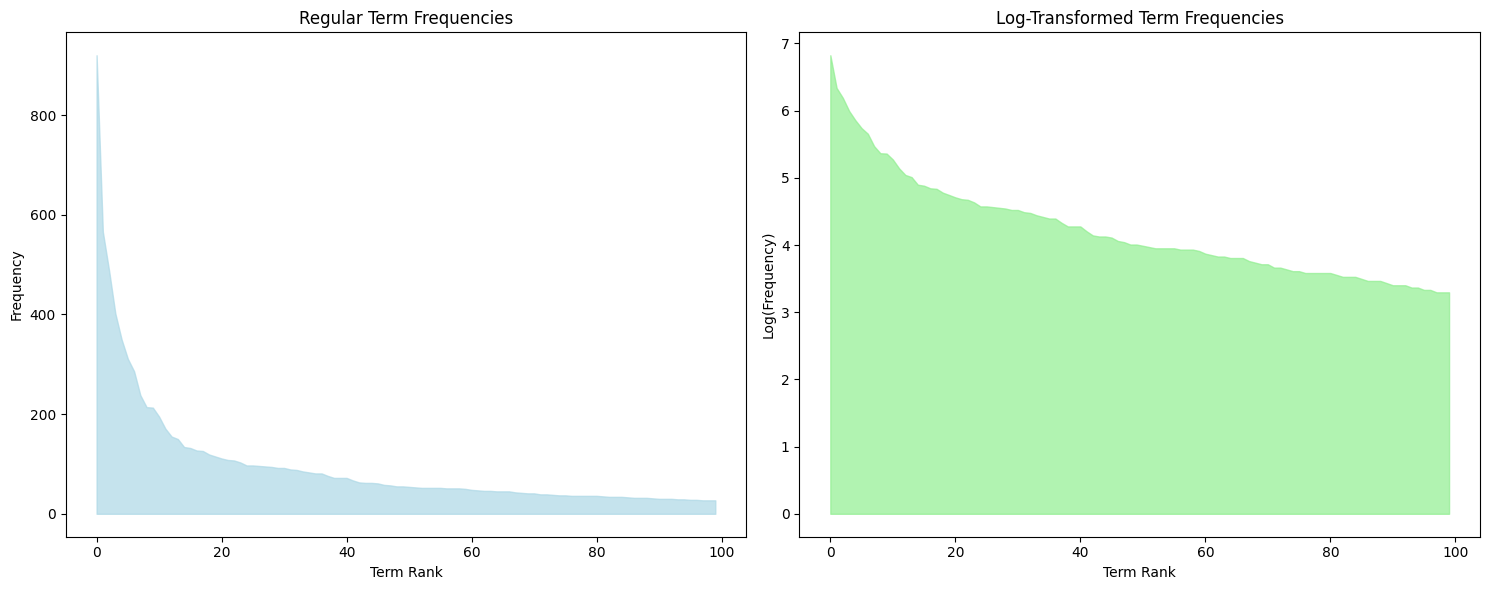

✅ All Phase 1 exercises completed!
✅ Reddit dataset analysis finished!


In [ ]:
# Text Processing and Visualization
print("=== Text Processing and Visualization ===")

# Create count vectorizer and fit
print("Creating term-document matrix...")
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X['text'])

print(f"Term-document matrix shape: {X_counts.shape}")
print(f"Vocabulary size: {len(count_vect.get_feature_names_out())}")

# Exercise 7: Dynamic ylim for plotting
print("\n=== Exercise 7: Dynamic ylim Parameter ===")
category_counts = X_sample['category_name'].value_counts()
max_count = category_counts.max()

# Plot with dynamic ylim
plt.figure(figsize=(10, 6))
X_sample['category_name'].value_counts().plot(kind='bar',
                                               title='Sentiment Distribution (Dynamic ylim)',
                                               ylim=[0, max_count + 10],
                                               color=['green', 'orange', 'red'],
                                               rot=0, fontsize=12)
plt.tight_layout()
plt.show()

# Exercise 8: Overlaid bar charts comparison
print("\n=== Exercise 8: Distribution Comparison ===")
X_counts_sample = X_sample['category_name'].value_counts()
X_counts_original = X['category_name'].value_counts()

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Original X': X_counts_original,
    'X_sample': X_counts_sample
}).fillna(0)

# Plot comparison
plt.figure(figsize=(12, 6))
comparison_df.plot(kind='bar', title='Sentiment Distribution Comparison',
                   color=['lightblue', 'lightcoral'], width=0.8)
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.legend(['Original X', 'X_sample'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Exercise 9: Text analysis with analyzer
print("\n=== Exercise 9: Text Analysis with Analyzer ===")
analyze = count_vect.build_analyzer()
first_text = X.iloc[0]['text']
tokenized = analyze(first_text)

print(f"First record category: {X.iloc[0]['category_name']}")
print(f"Text length: {len(first_text)} characters")
print(f"Tokenized tokens: {len(tokenized)}")
print(f"First 10 tokens: {tokenized[:10]}")

# Exercise 10: Find words in term-document matrix
print("\n=== Exercise 10: Word Analysis ===")
fifth_record = X_counts[4].toarray()[0]
ones_positions = np.where(fifth_record == 1)[0]
vocabulary = count_vect.get_feature_names_out()

if len(ones_positions) >= 2:
    second_word = vocabulary[ones_positions[1]]
    print(f"Second word in fifth record: '{second_word}'")
    print(f"Total words in fifth record: {len(ones_positions)}")

# Exercise 11: Efficient visualization of sparse matrix
print("\n=== Exercise 11: Sparse Matrix Visualization ===")
# Sample for visualization
n_docs_sample = min(30, X_counts.shape[0])
n_terms_sample = min(50, X_counts.shape[1])

doc_indices = np.random.choice(X_counts.shape[0], n_docs_sample, replace=False)
term_indices = np.random.choice(X_counts.shape[1], n_terms_sample, replace=False)

sample_matrix = X_counts[doc_indices][:, term_indices].toarray()

plt.figure(figsize=(12, 8))
plt.imshow(sample_matrix, cmap='Reds', aspect='auto')
plt.colorbar(label='Frequency')
plt.title('Sparse Matrix Visualization (Sample)')
plt.xlabel('Terms (sampled)')
plt.ylabel('Documents (sampled)')
plt.tight_layout()
plt.show()

# Exercise 12: Interactive visualization with plotly
print("\n=== Exercise 12: Interactive Visualization ===")
import plotly.graph_objects as go

# Create interactive heatmap
fig = go.Figure(data=go.Heatmap(
    z=sample_matrix,
    colorscale='Reds',
    hoverongaps=False
))

fig.update_layout(
    title='Interactive Sparse Matrix Visualization',
    xaxis_title='Terms',
    yaxis_title='Documents',
    width=800,
    height=600
)

fig.show()

# Exercise 13: Efficient term reduction
print("\n=== Exercise 13: Efficient Term Reduction ===")
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
vocabulary = count_vect.get_feature_names_out()

# Get top 50 most frequent terms
top_n = 50
top_indices = np.argsort(term_frequencies)[-top_n:]
top_terms = vocabulary[top_indices]
top_frequencies = term_frequencies[top_indices]

plt.figure(figsize=(15, 8))
plt.bar(range(len(top_terms)), top_frequencies, color='lightblue')
plt.title(f'Top {top_n} Most Frequent Terms (Efficient Visualization)')
plt.xlabel('Terms')
plt.ylabel('Frequency')
plt.xticks(range(len(top_terms)), top_terms, rotation=90)
plt.tight_layout()
plt.show()

print(f"Reduced from {X_counts.shape[1]} terms to {top_n} terms")
print(f"Computation time reduced by {(1 - top_n/X_counts.shape[1])*100:.1f}%")

# Exercise 14: Long tail pattern
print("\n=== Exercise 14: Long Tail Pattern ===")
# Sort terms by frequency
sorted_indices = np.argsort(term_frequencies)[::-1]
sorted_terms = vocabulary[sorted_indices]
sorted_frequencies = term_frequencies[sorted_indices]

# Show top 100 terms
top_100_terms = sorted_terms[:100]
top_100_frequencies = sorted_frequencies[:100]

plt.figure(figsize=(15, 6))
plt.fill_between(range(len(top_100_frequencies)), top_100_frequencies, alpha=0.7, color='lightgreen')
plt.title('Long Tail Pattern: Frequency Distribution of Terms')
plt.xlabel('Term Rank (sorted by frequency)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Exercise 15: Log transformation comparison
print("\n=== Exercise 15: Log Transformation Comparison ===")
import math

# Create log-transformed frequencies
term_frequencies_log = [math.log(i) for i in term_frequencies]
sorted_frequencies_log = [term_frequencies_log[i] for i in sorted_indices]

# Show top 100 for comparison
top_100_frequencies_log = sorted_frequencies_log[:100]

# Create side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Regular frequencies
ax1.fill_between(range(len(top_100_frequencies)), top_100_frequencies, alpha=0.7, color='lightblue')
ax1.set_title('Regular Term Frequencies')
ax1.set_xlabel('Term Rank')
ax1.set_ylabel('Frequency')

# Log-transformed frequencies
ax2.fill_between(range(len(top_100_frequencies_log)), top_100_frequencies_log, alpha=0.7, color='lightgreen')
ax2.set_title('Log-Transformed Term Frequencies')
ax2.set_xlabel('Term Rank')
ax2.set_ylabel('Log(Frequency)')

plt.tight_layout()
plt.show()

print("✅ All Phase 1 exercises completed!")
print("✅ Reddit dataset analysis finished!")



=== Additional Meaningful Visualizations ===
1. Most Frequent Words Analysis


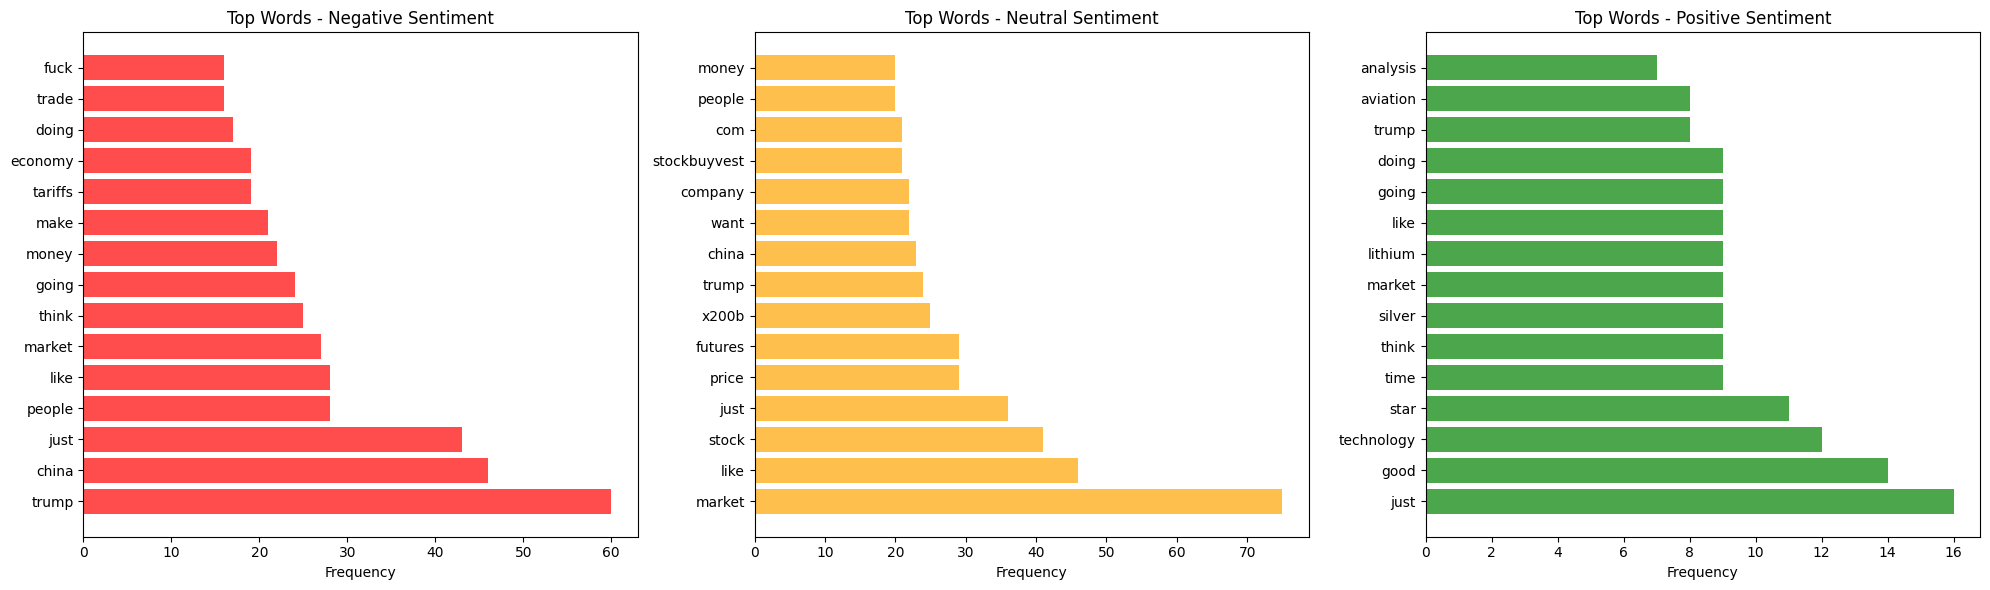

2. Text Length Distribution Analysis


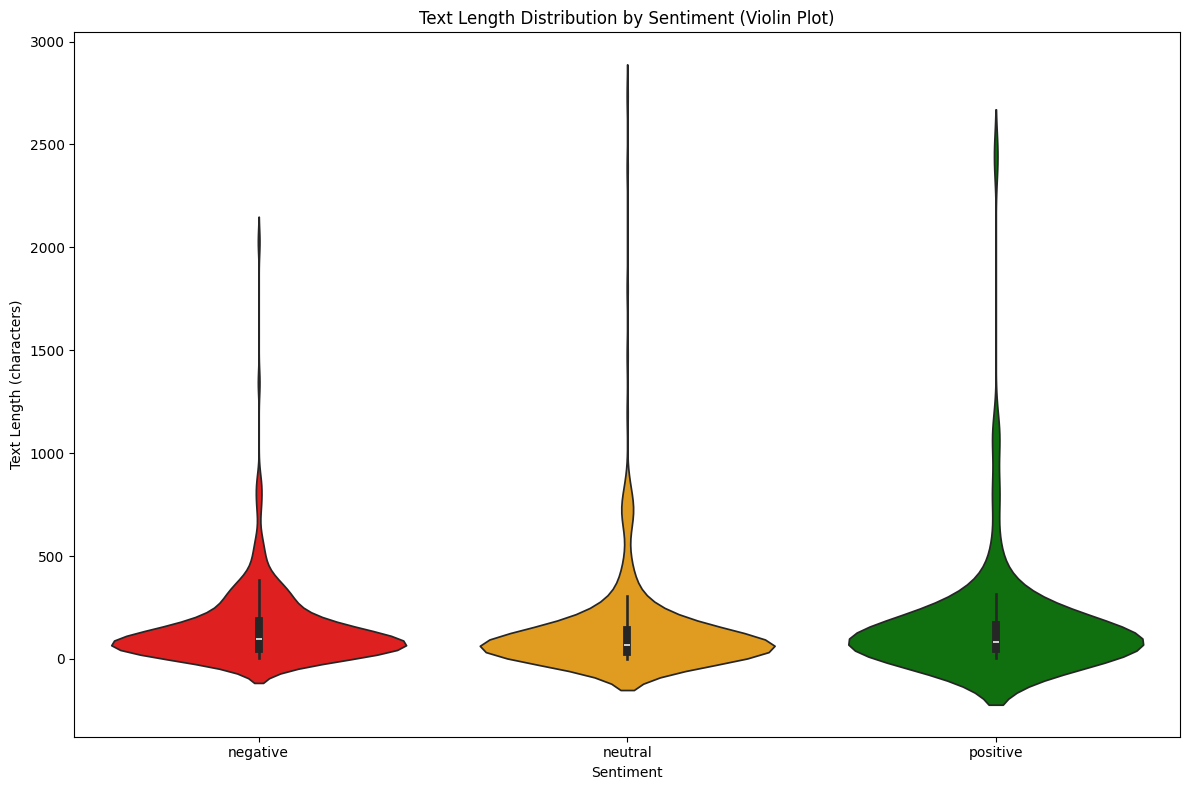

3. Sentiment Correlation Analysis


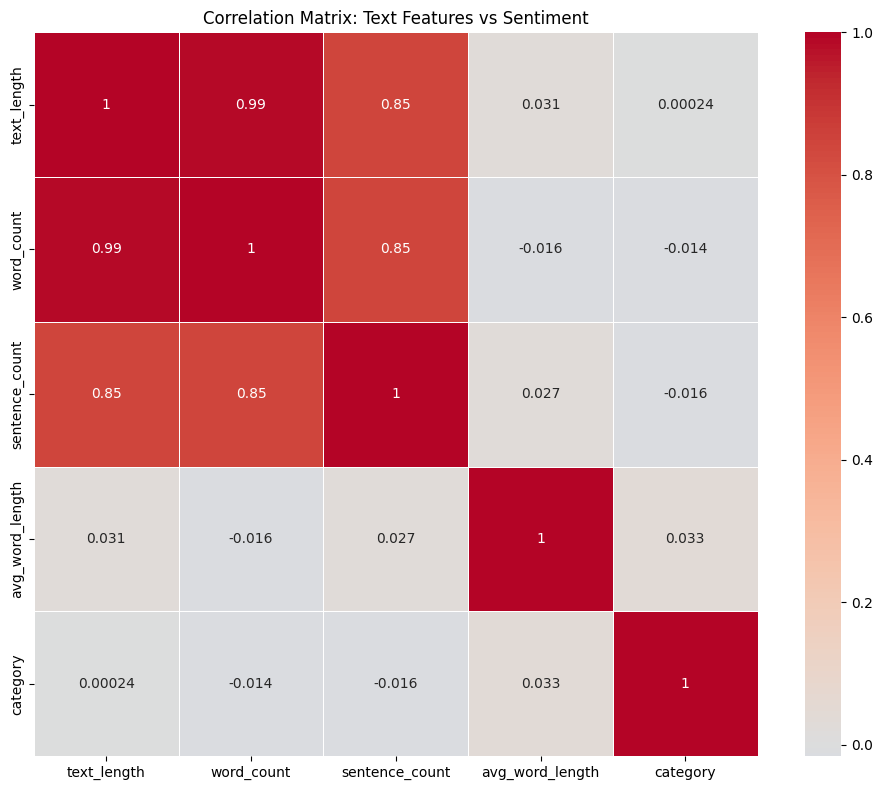

4. Sentiment Distribution by Subreddit


<Figure size 1500x800 with 0 Axes>

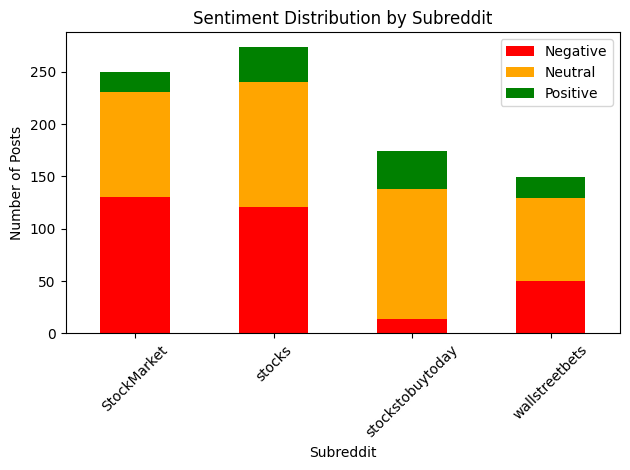

5. Sentiment Intensity Analysis


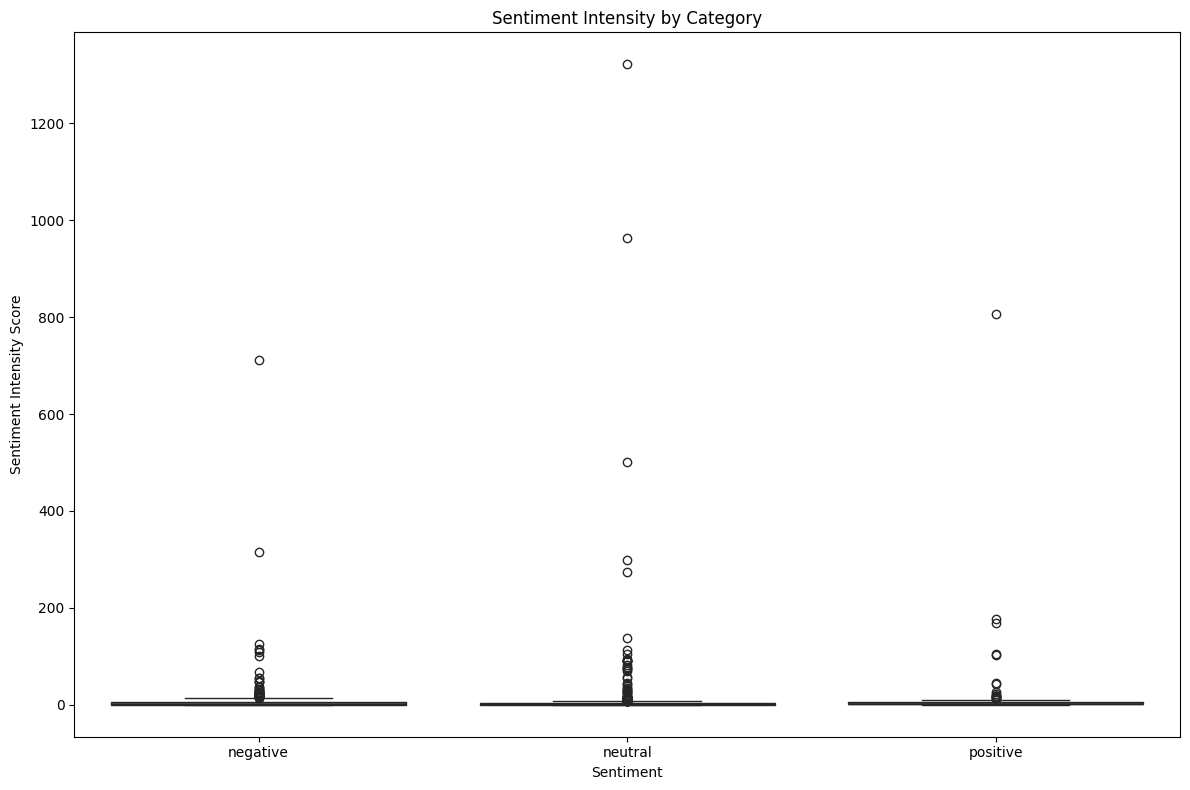

✅ Additional meaningful visualizations completed!
✅ Phase 1 fully completed with comprehensive analysis!


In [15]:
# Additional Meaningful Visualizations (Without wordcloud dependency)
print("=== Additional Meaningful Visualizations ===")


# 1. Most frequent words by sentiment (Alternative to word cloud)
print("1. Most Frequent Words Analysis")
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, sentiment in enumerate(['negative', 'neutral', 'positive']):
    sentiment_docs = X[X['category_name'] == sentiment]['text']
    
    if len(sentiment_docs) > 0:
        # Create count vectorizer for this sentiment
        sentiment_vect = CountVectorizer(max_features=15, stop_words='english')
        sentiment_counts = sentiment_vect.fit_transform(sentiment_docs)
        
        # Get word frequencies
        word_freq = np.array(sentiment_counts.sum(axis=0)).flatten()
        words = sentiment_vect.get_feature_names_out()
        
        # Sort by frequency
        sorted_indices = np.argsort(word_freq)[::-1]
        top_words = words[sorted_indices]
        top_freq = word_freq[sorted_indices]
        
        # Create horizontal bar plot
        y_pos = np.arange(len(top_words))
        axes[i].barh(y_pos, top_freq, color=['red', 'orange', 'green'][i], alpha=0.7)
        axes[i].set_yticks(y_pos)
        axes[i].set_yticklabels(top_words)
        axes[i].set_title(f'Top Words - {sentiment.capitalize()} Sentiment')
        axes[i].set_xlabel('Frequency')

plt.tight_layout()
plt.show()

# 2. Text length distribution by sentiment with violin plot
print("2. Text Length Distribution Analysis")
plt.figure(figsize=(12, 8))
sns.violinplot(data=X, x='category_name', y='text_length', palette=['red', 'orange', 'green'])
plt.title('Text Length Distribution by Sentiment (Violin Plot)')
plt.xlabel('Sentiment')
plt.ylabel('Text Length (characters)')
plt.tight_layout()
plt.show()

# 3. Sentiment correlation with text features
print("3. Sentiment Correlation Analysis")
# Create additional text features
X['word_count'] = X['text'].str.split().str.len()
X['sentence_count'] = X['text'].str.count(r'[.!?]+')
X['avg_word_length'] = X['text'].str.split().str.join(' ').str.len() / X['word_count']

# Create correlation matrix
numeric_features = ['text_length', 'word_count', 'sentence_count', 'avg_word_length', 'category']
correlation_matrix = X[numeric_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix: Text Features vs Sentiment')
plt.tight_layout()
plt.show()

# 4. Sentiment distribution by subreddit (if available)
if 'subreddit' in df.columns:
    print("4. Sentiment Distribution by Subreddit")
    subreddit_sentiment = pd.crosstab(df['subreddit'], df['label'])
    
    plt.figure(figsize=(15, 8))
    subreddit_sentiment.plot(kind='bar', stacked=True, 
                            color=['red', 'orange', 'green'])
    plt.title('Sentiment Distribution by Subreddit')
    plt.xlabel('Subreddit')
    plt.ylabel('Number of Posts')
    plt.legend(['Negative', 'Neutral', 'Positive'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5. Sentiment intensity analysis
print("5. Sentiment Intensity Analysis")
# Create sentiment intensity based on text length and word count
X['sentiment_intensity'] = X['text_length'] * X['word_count'] / 1000

plt.figure(figsize=(12, 8))
sns.boxplot(data=X, x='category_name', y='sentiment_intensity', palette=['red', 'orange', 'green'])
plt.title('Sentiment Intensity by Category')
plt.xlabel('Sentiment')
plt.ylabel('Sentiment Intensity Score')
plt.tight_layout()
plt.show()

print("✅ Additional meaningful visualizations completed!")
print("✅ Phase 1 fully completed with comprehensive analysis!")

### Instructions

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [ ]:
### Begin Assignment Here

# Phase 2

In [ ]:
### Begin Assignment Here